In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

In [2]:
test_df = pd.read_csv('Fraud Simulator/transaction_fraud_set_trainandtest.csv')
test_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
0,0,4/1/2018 0:00,596,3156,57.16,31,0,0
1,1,4/1/2018 0:02,4961,3412,81.51,130,0,0
2,2,4/1/2018 0:07,2,1365,146.00,476,0,0
3,3,4/1/2018 0:09,4128,8737,64.49,569,0,0
4,4,4/1/2018 0:10,927,9906,50.99,634,0,0
...,...,...,...,...,...,...,...,...
771048,771048,6/20/2018 10:21,3034,9064,20.64,6949268,80,0
771049,771049,6/20/2018 10:21,1963,3024,6.80,6949273,80,0
771050,771050,6/20/2018 10:21,2283,1396,33.92,6949277,80,0
771051,771051,6/20/2018 10:21,929,5415,14.26,6949282,80,0


In [3]:
# Separate the features (input variables) from the labels (fraudulent or legitimate)
X = test_df.drop(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD'], axis=1)
y = test_df['TX_FRAUD']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Create an instance of the LogisticRegression model
model = LogisticRegression()

In [7]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153037      0]
 [  1059    115]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    153037
           1       1.00      0.10      0.18      1174

    accuracy                           0.99    154211
   macro avg       1.00      0.55      0.59    154211
weighted avg       0.99      0.99      0.99    154211



In [10]:
new_data_df = pd.read_csv('Fraud Simulator/transaction_fraud_set_newdata.csv')

In [11]:
# Preprocess the new transactions
new_X = new_data_df.drop(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'], axis=1)
new_X = scaler.transform(new_X)  # Apply the same scaling as done during training


In [12]:
# Make predictions on the new transactions
new_predictions = model.predict(new_X)

In [13]:
# Print the flagged fraud transactions
fraud_indices = [index for index, prediction in enumerate(new_predictions) if prediction == 1]
flagged_transactions = new_data_df.iloc[fraud_indices]
flagged_transactions

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
309,771362,6/20/2018 10:47,2110,3399,702.85,6950862,80
310,771363,6/20/2018 10:47,2110,511,690.80,6950868,80
1328,772381,6/20/2018 12:17,3715,9666,624.90,6956240,80
2820,773873,6/20/2018 14:30,2110,4865,372.90,6964214,80
5067,776120,6/20/2018 19:23,863,5531,395.30,6981813,80
...,...,...,...,...,...,...,...
979404,1750457,9/30/2018 13:43,4314,5774,386.35,15774236,182
979808,1750861,9/30/2018 14:19,3280,1405,427.50,15776366,182
980327,1751380,9/30/2018 15:05,3516,6801,569.40,15779102,182
981195,1752248,9/30/2018 16:36,1771,7763,375.95,15784585,182


In [14]:
# now comparing analysis of correct, vs incorrect.
correct_results_df = pd.read_csv('Fraud Simulator/transaction_fraud_set_newdata_uncut.csv')

In [15]:
#joining the test table with the labels to check for false positives.
flagged_info = pd.merge(flagged_transactions, correct_results_df, on=['TRANSACTION_ID','TX_DATETIME','CUSTOMER_ID','TERMINAL_ID','TX_AMOUNT','TX_TIME_SECONDS','TX_TIME_DAYS'], how='inner')
flagged_info

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,771362,6/20/2018 10:47,2110,3399,702.85,6950862,80,1,3
1,771363,6/20/2018 10:47,2110,511,690.80,6950868,80,1,3
2,772381,6/20/2018 12:17,3715,9666,624.90,6956240,80,1,3
3,773873,6/20/2018 14:30,2110,4865,372.90,6964214,80,1,3
4,776120,6/20/2018 19:23,863,5531,395.30,6981813,80,1,3
...,...,...,...,...,...,...,...,...,...
974,1750457,9/30/2018 13:43,4314,5774,386.35,15774236,182,1,3
975,1750861,9/30/2018 14:19,3280,1405,427.50,15776366,182,1,3
976,1751380,9/30/2018 15:05,3516,6801,569.40,15779102,182,1,3
977,1752248,9/30/2018 16:36,1771,7763,375.95,15784585,182,1,3


In [16]:
#checking if there are any false positives
false_positives = flagged_info[flagged_info['TX_FRAUD'] < 1]
false_positives #none found

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO


In [17]:
#Finding any false negatives
#First getting length of positives
filtered_results_df = correct_results_df[correct_results_df['TX_FRAUD'] == 1]
total_positive = len(filtered_results_df)
#Now we find how many were missed
false_negatives = total_positive - len(flagged_info)

print(f'There are {false_negatives} frauds that went undetected.')

There are 7810 frauds that went undetected.


In [18]:
# Now we remove the flagged transactions from the total positives to find where the error was

# Get the list of flagged transaction IDs
flagged_transaction_ids = flagged_transactions['TRANSACTION_ID'].tolist()

# Exclude flagged transaction IDs from correct results
false_negatives_df = filtered_results_df[~filtered_results_df['TRANSACTION_ID'].isin(flagged_transaction_ids)]
false_negatives_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
95,771148,6/20/2018 10:29,4577,1042,25.08,6949779,80,1,2
200,771253,6/20/2018 10:40,2139,2293,8.27,6950413,80,1,2
249,771302,6/20/2018 10:43,4257,4774,6.52,6950610,80,1,2
328,771381,6/20/2018 10:49,3655,4876,12.52,6950944,80,1,2
372,771425,6/20/2018 10:52,714,2293,52.25,6951153,80,1,2
...,...,...,...,...,...,...,...,...,...
982471,1753524,9/30/2018 19:51,1671,3192,128.60,15796308,182,1,3
982547,1753600,9/30/2018 20:09,4166,632,17.39,15797340,182,1,2
982620,1753673,9/30/2018 20:30,4097,1558,24.04,15798652,182,1,2
982961,1754014,9/30/2018 22:27,100,8604,73.85,15805624,182,1,3


In [19]:
#getting counts to begin graphing
scenario_1_counts = false_negatives_df['TX_FRAUD_SCENARIO'].value_counts()[1]
scenario_2_counts = false_negatives_df['TX_FRAUD_SCENARIO'].value_counts()[2]
scenario_3_counts = false_negatives_df['TX_FRAUD_SCENARIO'].value_counts()[3]
print(scenario_1_counts)
print(scenario_2_counts)
print(scenario_3_counts)

561
5518
1731


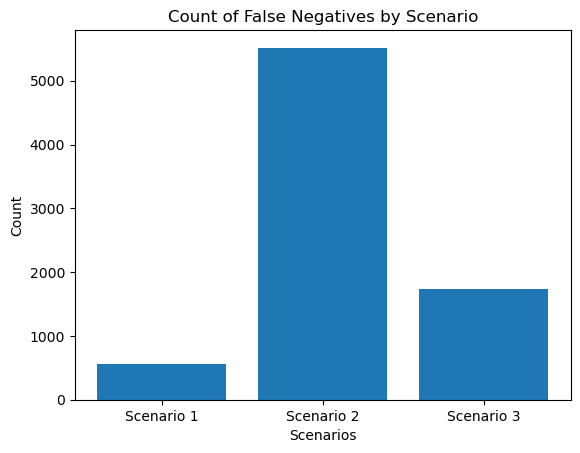

<Figure size 640x480 with 0 Axes>

In [20]:
# Creating labels and counts for the bars
scenarios = ['Scenario 1', 'Scenario 2', 'Scenario 3']
counts = [scenario_1_counts, scenario_2_counts, scenario_3_counts]

# Plotting the bar chart
plt.bar(scenarios, counts)

# Adding labels and title
plt.xlabel('Scenarios')
plt.ylabel('Count')
plt.title('Count of False Negatives by Scenario')

# Displaying the chart
plt.show()

plt.savefig('Count of False Negatives by Scenario.png')

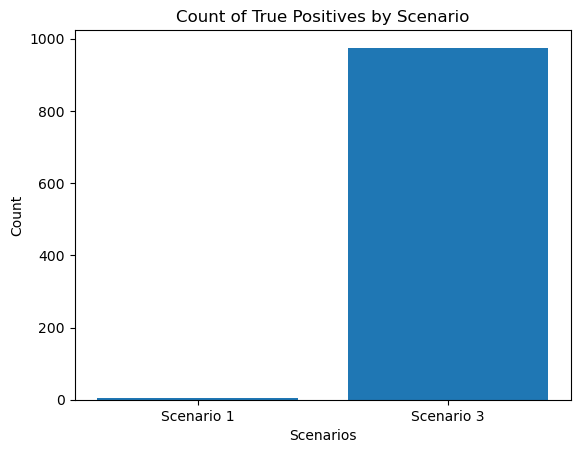

In [21]:
scenario_1_counts = flagged_info['TX_FRAUD_SCENARIO'].value_counts()[1]
scenario_3_counts = flagged_info['TX_FRAUD_SCENARIO'].value_counts()[3]

# Creating labels and counts for the bars
scenarios = ['Scenario 1', 'Scenario 3']
counts = [scenario_1_counts, scenario_3_counts]

# Plotting the bar chart
plt.bar(scenarios, counts)

# Adding labels and title
plt.xlabel('Scenarios')
plt.ylabel('Count')
plt.title('Count of True Positives by Scenario')

plt.savefig('Count of True Positives by Scenario.png')

# Displaying the chart
plt.show()



In [22]:
#We know there are no false positives. Only True positives, true negatives, and false negatives.
#Placing classification for easy reference
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    153037
           1       1.00      0.10      0.18      1174

    accuracy                           0.99    154211
   macro avg       1.00      0.55      0.59    154211
weighted avg       0.99      0.99      0.99    154211



In [23]:
#Oversampling to boost minority class (This did not work so we're maintaing original)

# instance of the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Train model on the oversampled data
model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86    153037
           1       0.02      0.52      0.03      1174

    accuracy                           0.75    154211
   macro avg       0.51      0.64      0.44    154211
weighted avg       0.99      0.75      0.85    154211

